In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [17]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v8
from Resources.Game import *


In [35]:
model = Model_v8()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v8_3')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v8_3/model_{}_batches'.format(newest_model)))
# model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v78Parallel/model_800_batches'))
criterion = nn.MSELoss()

n_games         = 50 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [36]:
print(latest_batch_index)

2150


validation error for model_batch 10: 
mean = 0.5600000023841858, median = 0.5600000023841858, std = 0.30000001192092896
validation error for model_batch 20: 
mean = 0.6299999952316284, median = 0.6499999761581421, std = 0.28999999165534973


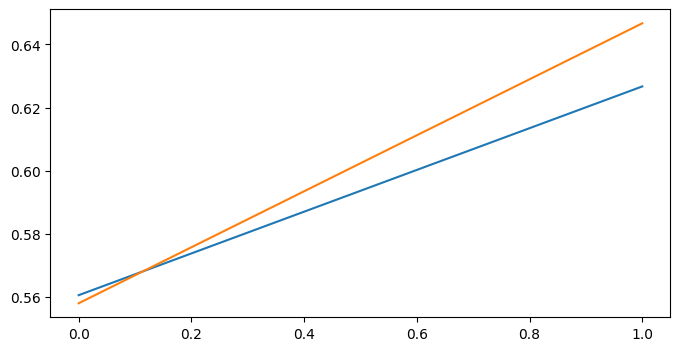

validation error for model_batch 30: 
mean = 0.5, median = 0.46000000834465027, std = 0.2800000011920929
validation error for model_batch 40: 
mean = 0.6200000047683716, median = 0.5199999809265137, std = 0.3400000035762787
validation error for model_batch 50: 
mean = 0.6000000238418579, median = 0.5600000023841858, std = 0.3499999940395355
validation error for model_batch 60: 
mean = 0.5899999737739563, median = 0.5400000214576721, std = 0.3199999928474426
validation error for model_batch 70: 
mean = 0.5, median = 0.4300000071525574, std = 0.2800000011920929
validation error for model_batch 80: 
mean = 0.46000000834465027, median = 0.33000001311302185, std = 0.33000001311302185
validation error for model_batch 90: 
mean = 0.5099999904632568, median = 0.4699999988079071, std = 0.28999999165534973
validation error for model_batch 100: 
mean = 0.5299999713897705, median = 0.5199999809265137, std = 0.2800000011920929
validation error for model_batch 110: 
mean = 0.5199999809265137, median

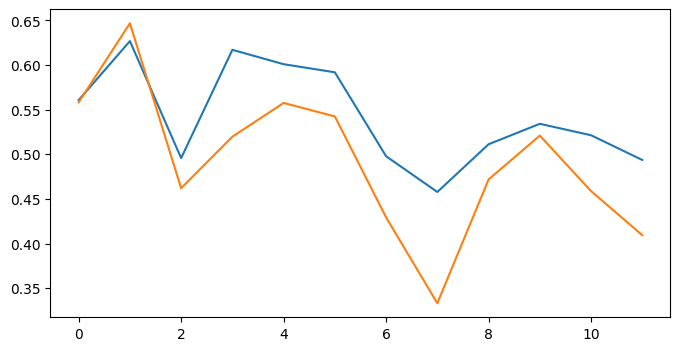

validation error for model_batch 130: 
mean = 0.38999998569488525, median = 0.36000001430511475, std = 0.25
validation error for model_batch 140: 
mean = 0.5600000023841858, median = 0.5299999713897705, std = 0.30000001192092896
validation error for model_batch 150: 
mean = 0.47999998927116394, median = 0.46000000834465027, std = 0.25
validation error for model_batch 160: 
mean = 0.4399999976158142, median = 0.33000001311302185, std = 0.3100000023841858
validation error for model_batch 170: 
mean = 0.38999998569488525, median = 0.30000001192092896, std = 0.2800000011920929
validation error for model_batch 180: 
mean = 0.46000000834465027, median = 0.4000000059604645, std = 0.33000001311302185
validation error for model_batch 190: 
mean = 0.46000000834465027, median = 0.4099999964237213, std = 0.3100000023841858
validation error for model_batch 200: 
mean = 0.46000000834465027, median = 0.4000000059604645, std = 0.3100000023841858
validation error for model_batch 210: 
mean = 0.43000000

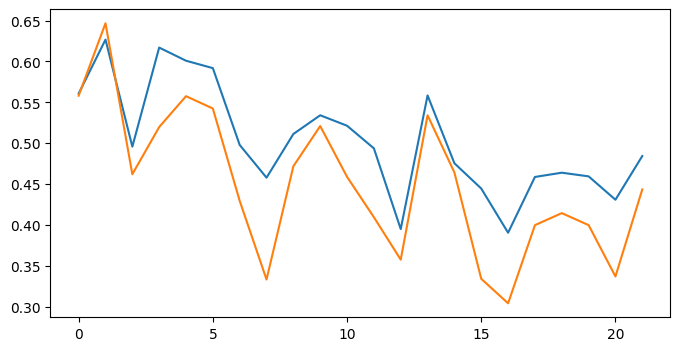

validation error for model_batch 230: 
mean = 0.38999998569488525, median = 0.3499999940395355, std = 0.23999999463558197
validation error for model_batch 240: 
mean = nan, median = nan, std = nan
validation error for model_batch 250: 
mean = 0.4000000059604645, median = 0.3199999928474426, std = 0.25
validation error for model_batch 260: 
mean = 0.38999998569488525, median = 0.3400000035762787, std = 0.23999999463558197
validation error for model_batch 270: 
mean = nan, median = nan, std = nan
validation error for model_batch 280: 
mean = 0.4399999976158142, median = 0.41999998688697815, std = 0.30000001192092896
validation error for model_batch 290: 
mean = 0.4300000071525574, median = 0.36000001430511475, std = 0.27000001072883606
validation error for model_batch 300: 
mean = 0.47999998927116394, median = 0.3799999952316284, std = 0.3400000035762787
validation error for model_batch 310: 
mean = 0.41999998688697815, median = 0.3499999940395355, std = 0.30000001192092896
validation er

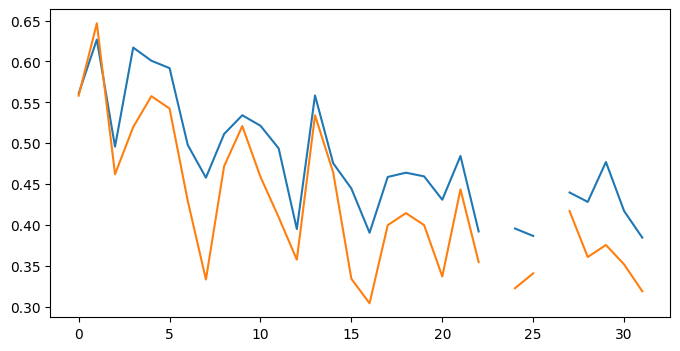

validation error for model_batch 330: 
mean = 0.4099999964237213, median = 0.3700000047683716, std = 0.2800000011920929
validation error for model_batch 340: 
mean = 0.3799999952316284, median = 0.30000001192092896, std = 0.27000001072883606
validation error for model_batch 350: 
mean = 0.4399999976158142, median = 0.4099999964237213, std = 0.27000001072883606
validation error for model_batch 360: 
mean = 0.4000000059604645, median = 0.3400000035762787, std = 0.25999999046325684
validation error for model_batch 370: 
mean = 0.4300000071525574, median = 0.3100000023841858, std = 0.3499999940395355
validation error for model_batch 380: 
mean = 0.3799999952316284, median = 0.3199999928474426, std = 0.25
validation error for model_batch 390: 
mean = 0.46000000834465027, median = 0.3799999952316284, std = 0.3100000023841858
validation error for model_batch 400: 
mean = 0.3100000023841858, median = 0.1899999976158142, std = 0.2800000011920929
validation error for model_batch 410: 
mean = 0.3

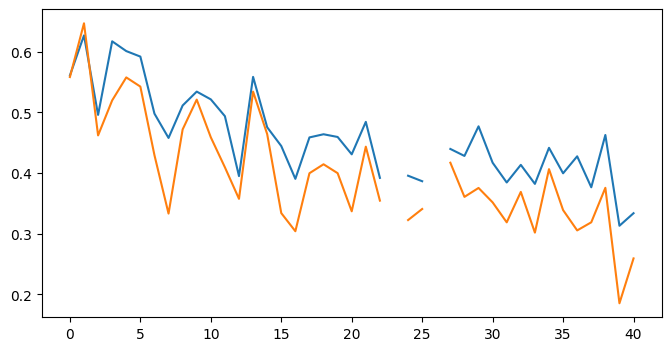

validation error for model_batch 430: 
mean = 0.36000001430511475, median = 0.30000001192092896, std = 0.25999999046325684
validation error for model_batch 440: 
mean = 0.3700000047683716, median = 0.2800000011920929, std = 0.28999999165534973
validation error for model_batch 450: 
mean = 0.4099999964237213, median = 0.30000001192092896, std = 0.27000001072883606
validation error for model_batch 470: 
mean = 0.38999998569488525, median = 0.27000001072883606, std = 0.33000001311302185
validation error for model_batch 480: 
mean = 0.38999998569488525, median = 0.3400000035762787, std = 0.25
validation error for model_batch 490: 
mean = 0.4000000059604645, median = 0.3700000047683716, std = 0.25999999046325684
validation error for model_batch 500: 
mean = 0.38999998569488525, median = 0.25999999046325684, std = 0.30000001192092896
validation error for model_batch 510: 
mean = nan, median = nan, std = nan
validation error for model_batch 520: 
mean = 0.3100000023841858, median = 0.20000000

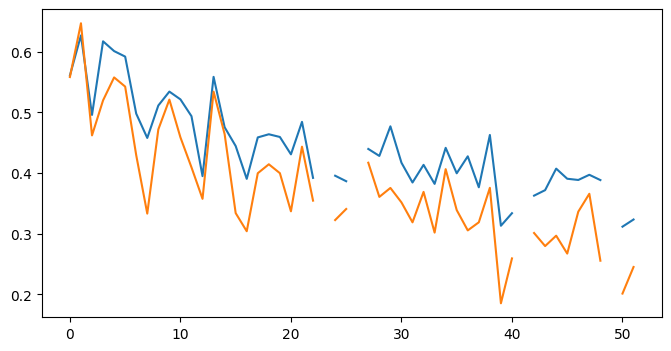

validation error for model_batch 540: 
mean = 0.3499999940395355, median = 0.28999999165534973, std = 0.25
validation error for model_batch 550: 
mean = 0.4399999976158142, median = 0.3499999940395355, std = 0.30000001192092896
validation error for model_batch 560: 
mean = 0.38999998569488525, median = 0.36000001430511475, std = 0.25999999046325684
validation error for model_batch 570: 
mean = 0.3700000047683716, median = 0.2800000011920929, std = 0.27000001072883606
validation error for model_batch 580: 
mean = 0.4000000059604645, median = 0.3499999940395355, std = 0.27000001072883606
validation error for model_batch 590: 
mean = 0.38999998569488525, median = 0.30000001192092896, std = 0.30000001192092896
validation error for model_batch 600: 
mean = 0.38999998569488525, median = 0.25999999046325684, std = 0.3100000023841858
validation error for model_batch 610: 
mean = 0.3499999940395355, median = 0.2800000011920929, std = 0.25
validation error for model_batch 620: 
mean = 0.28999999

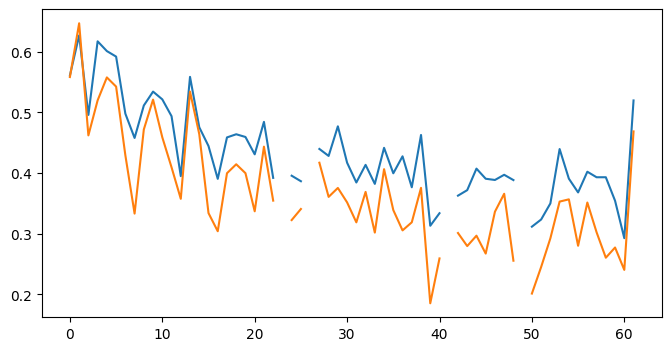

validation error for model_batch 640: 
mean = 0.36000001430511475, median = 0.23999999463558197, std = 0.28999999165534973
validation error for model_batch 650: 
mean = 0.46000000834465027, median = 0.3799999952316284, std = 0.28999999165534973
validation error for model_batch 660: 
mean = 0.49000000953674316, median = 0.41999998688697815, std = 0.3100000023841858
validation error for model_batch 670: 
mean = 0.41999998688697815, median = 0.28999999165534973, std = 0.3199999928474426
validation error for model_batch 680: 
mean = 0.3199999928474426, median = 0.27000001072883606, std = 0.23000000417232513
validation error for model_batch 690: 
mean = nan, median = nan, std = nan
validation error for model_batch 700: 
mean = nan, median = nan, std = nan
validation error for model_batch 710: 
mean = 0.3799999952316284, median = 0.27000001072883606, std = 0.28999999165534973
validation error for model_batch 720: 
mean = 0.3700000047683716, median = 0.25999999046325684, std = 0.3000000119209

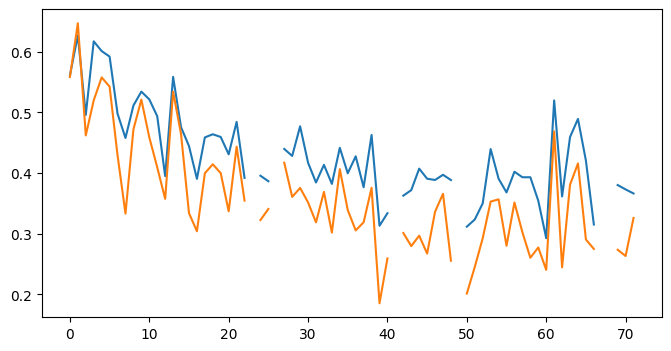

validation error for model_batch 740: 
mean = 0.4300000071525574, median = 0.4099999964237213, std = 0.27000001072883606
validation error for model_batch 750: 
mean = 0.36000001430511475, median = 0.28999999165534973, std = 0.27000001072883606
validation error for model_batch 760: 
mean = 0.3799999952316284, median = 0.36000001430511475, std = 0.2800000011920929
validation error for model_batch 770: 
mean = 0.38999998569488525, median = 0.27000001072883606, std = 0.2800000011920929
validation error for model_batch 780: 
mean = 0.3799999952316284, median = 0.28999999165534973, std = 0.3100000023841858
validation error for model_batch 790: 
mean = 0.3700000047683716, median = 0.27000001072883606, std = 0.27000001072883606
validation error for model_batch 800: 
mean = 0.3400000035762787, median = 0.25999999046325684, std = 0.23999999463558197
validation error for model_batch 810: 
mean = 0.30000001192092896, median = 0.25999999046325684, std = 0.20000000298023224
validation error for mode

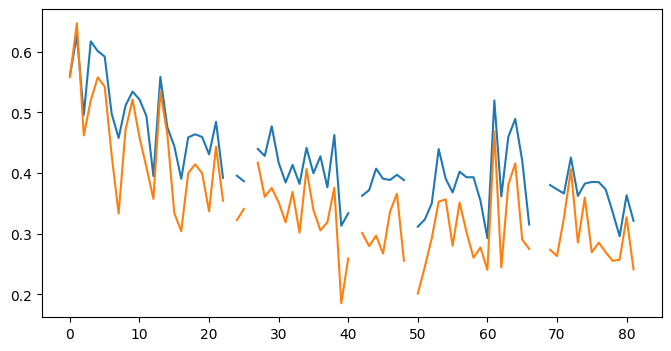

validation error for model_batch 840: 
mean = 0.3400000035762787, median = 0.23000000417232513, std = 0.30000001192092896
validation error for model_batch 850: 
mean = 0.3199999928474426, median = 0.25999999046325684, std = 0.20999999344348907
validation error for model_batch 860: 
mean = 0.38999998569488525, median = 0.3199999928474426, std = 0.25999999046325684
validation error for model_batch 870: 
mean = 0.4399999976158142, median = 0.28999999165534973, std = 0.3400000035762787
validation error for model_batch 880: 
mean = 0.4000000059604645, median = 0.3400000035762787, std = 0.2800000011920929
validation error for model_batch 890: 
mean = 0.3700000047683716, median = 0.28999999165534973, std = 0.25
validation error for model_batch 900: 
mean = 0.38999998569488525, median = 0.30000001192092896, std = 0.2800000011920929
validation error for model_batch 910: 
mean = 0.28999999165534973, median = 0.2199999988079071, std = 0.20999999344348907
validation error for model_batch 920: 
mea

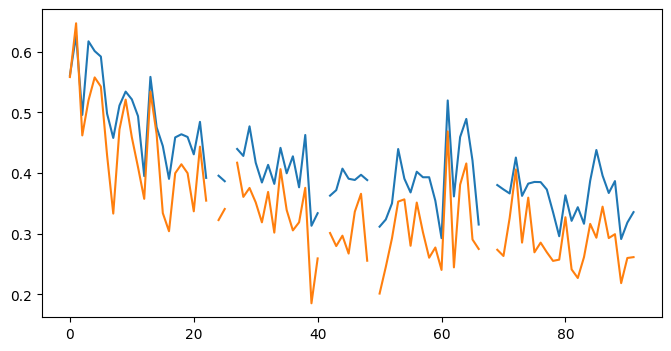

validation error for model_batch 940: 
mean = 0.3799999952316284, median = 0.27000001072883606, std = 0.3499999940395355
validation error for model_batch 950: 
mean = 0.33000001311302185, median = 0.27000001072883606, std = 0.2199999988079071
validation error for model_batch 960: 
mean = 0.38999998569488525, median = 0.2800000011920929, std = 0.30000001192092896
validation error for model_batch 970: 
mean = 0.4000000059604645, median = 0.2800000011920929, std = 0.33000001311302185
validation error for model_batch 980: 
mean = 0.33000001311302185, median = 0.2800000011920929, std = 0.23999999463558197
validation error for model_batch 990: 
mean = 0.3499999940395355, median = 0.2800000011920929, std = 0.27000001072883606
validation error for model_batch 1000: 
mean = 0.3499999940395355, median = 0.20999999344348907, std = 0.30000001192092896
validation error for model_batch 1010: 
mean = 0.30000001192092896, median = 0.20999999344348907, std = 0.25999999046325684
validation error for mod

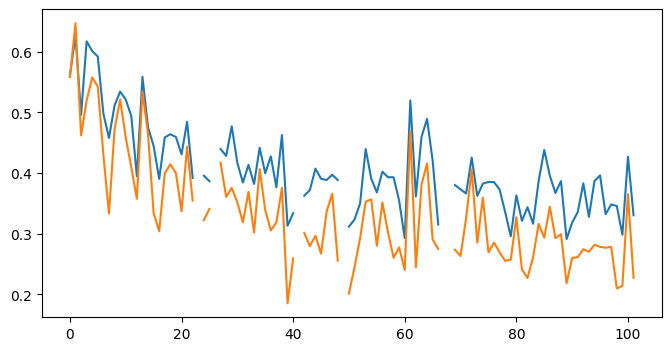

validation error for model_batch 1040: 
mean = 0.3799999952316284, median = 0.30000001192092896, std = 0.25999999046325684
validation error for model_batch 1050: 
mean = 0.36000001430511475, median = 0.25, std = 0.30000001192092896
validation error for model_batch 1060: 
mean = 0.3400000035762787, median = 0.23000000417232513, std = 0.2800000011920929
validation error for model_batch 1070: 
mean = 0.38999998569488525, median = 0.3100000023841858, std = 0.3100000023841858
validation error for model_batch 1080: 
mean = 0.4300000071525574, median = 0.3799999952316284, std = 0.30000001192092896
validation error for model_batch 1090: 
mean = 0.4399999976158142, median = 0.4000000059604645, std = 0.27000001072883606
validation error for model_batch 1100: 
mean = 0.4000000059604645, median = 0.33000001311302185, std = 0.30000001192092896
validation error for model_batch 1110: 
mean = 0.3400000035762787, median = 0.23000000417232513, std = 0.28999999165534973
validation error for model_batch 1

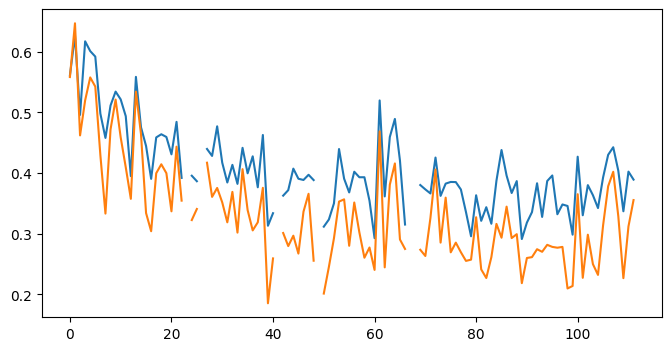

validation error for model_batch 1140: 
mean = nan, median = nan, std = nan
validation error for model_batch 1150: 
mean = 0.4300000071525574, median = 0.3400000035762787, std = 0.28999999165534973
validation error for model_batch 1160: 
mean = 0.38999998569488525, median = 0.3799999952316284, std = 0.23000000417232513
validation error for model_batch 1170: 
mean = 0.3199999928474426, median = 0.20999999344348907, std = 0.2800000011920929
validation error for model_batch 1180: 
mean = 0.4000000059604645, median = 0.23000000417232513, std = 0.3700000047683716
validation error for model_batch 1190: 
mean = 0.3700000047683716, median = 0.23000000417232513, std = 0.36000001430511475
validation error for model_batch 1200: 
mean = 0.46000000834465027, median = 0.3199999928474426, std = 0.3400000035762787
validation error for model_batch 1210: 
mean = 0.41999998688697815, median = 0.30000001192092896, std = 0.33000001311302185
validation error for model_batch 1220: 
mean = 0.3799999952316284,

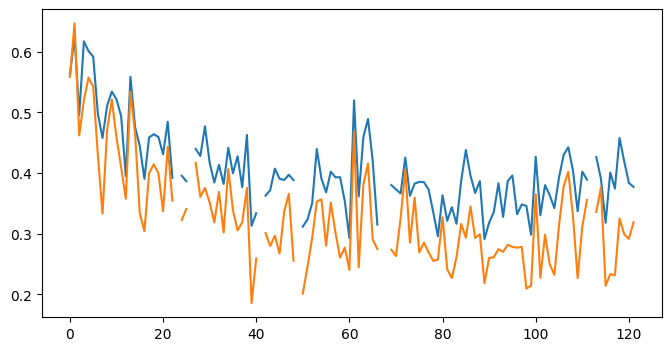

validation error for model_batch 1240: 
mean = 0.4300000071525574, median = 0.38999998569488525, std = 0.3100000023841858
validation error for model_batch 1250: 
mean = 0.3199999928474426, median = 0.25999999046325684, std = 0.23000000417232513
validation error for model_batch 1260: 
mean = 0.3400000035762787, median = 0.25, std = 0.25999999046325684
validation error for model_batch 1270: 
mean = 0.3700000047683716, median = 0.3100000023841858, std = 0.25999999046325684
validation error for model_batch 1280: 
mean = 0.41999998688697815, median = 0.36000001430511475, std = 0.25999999046325684
validation error for model_batch 1290: 
mean = 0.36000001430511475, median = 0.2800000011920929, std = 0.27000001072883606
validation error for model_batch 1300: 
mean = 0.41999998688697815, median = 0.3400000035762787, std = 0.3100000023841858
validation error for model_batch 1310: 
mean = 0.28999999165534973, median = 0.2199999988079071, std = 0.2199999988079071
validation error for model_batch 1

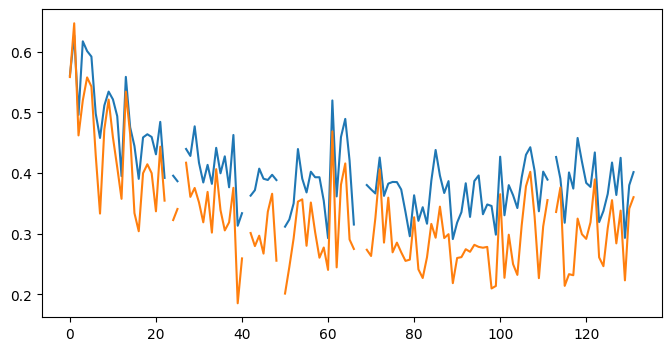

validation error for model_batch 1340: 
mean = 0.3199999928474426, median = 0.25, std = 0.2800000011920929
validation error for model_batch 1350: 
mean = 0.3400000035762787, median = 0.25, std = 0.25999999046325684
validation error for model_batch 1360: 
mean = 0.4099999964237213, median = 0.2800000011920929, std = 0.3100000023841858
validation error for model_batch 1370: 
mean = 0.4099999964237213, median = 0.30000001192092896, std = 0.3100000023841858
validation error for model_batch 1380: 
mean = 0.3700000047683716, median = 0.2800000011920929, std = 0.28999999165534973
validation error for model_batch 1390: 
mean = 0.28999999165534973, median = 0.2199999988079071, std = 0.2199999988079071
validation error for model_batch 1400: 
mean = 0.44999998807907104, median = 0.3499999940395355, std = 0.3799999952316284
validation error for model_batch 1410: 
mean = 0.3100000023841858, median = 0.23000000417232513, std = 0.2199999988079071
validation error for model_batch 1420: 
mean = 0.37999

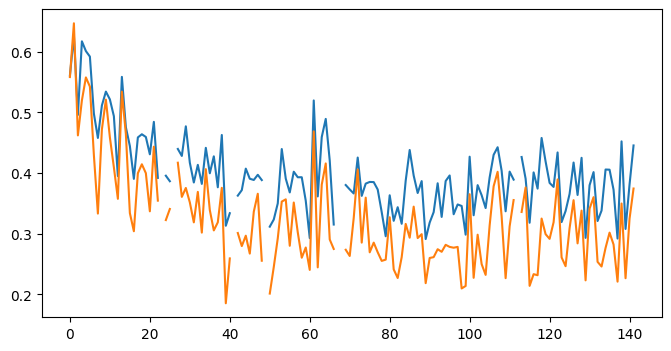

validation error for model_batch 1440: 
mean = 0.3700000047683716, median = 0.3799999952316284, std = 0.25
validation error for model_batch 1450: 
mean = nan, median = nan, std = nan
validation error for model_batch 1460: 
mean = 0.4099999964237213, median = 0.33000001311302185, std = 0.3100000023841858
validation error for model_batch 1470: 
mean = 0.4099999964237213, median = 0.3100000023841858, std = 0.3199999928474426
validation error for model_batch 1480: 
mean = 0.3700000047683716, median = 0.23999999463558197, std = 0.3100000023841858
validation error for model_batch 1490: 
mean = 0.33000001311302185, median = 0.25999999046325684, std = 0.25999999046325684
validation error for model_batch 1500: 
mean = 0.4000000059604645, median = 0.2800000011920929, std = 0.3199999928474426
validation error for model_batch 1510: 
mean = 0.36000001430511475, median = 0.27000001072883606, std = 0.28999999165534973
validation error for model_batch 1520: 
mean = 0.33000001311302185, median = 0.2399

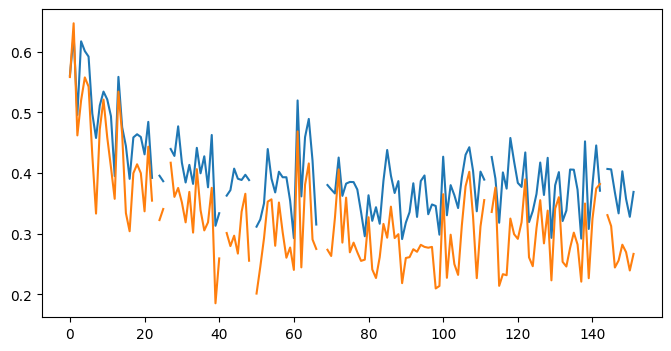

validation error for model_batch 1540: 
mean = 0.3400000035762787, median = 0.23000000417232513, std = 0.30000001192092896
validation error for model_batch 1550: 
mean = nan, median = nan, std = nan
validation error for model_batch 1560: 
mean = nan, median = nan, std = nan
validation error for model_batch 1610: 
mean = 0.3499999940395355, median = 0.2800000011920929, std = 0.27000001072883606
validation error for model_batch 1630: 
mean = 0.4099999964237213, median = 0.30000001192092896, std = 0.28999999165534973
validation error for model_batch 1640: 
mean = 0.33000001311302185, median = 0.25999999046325684, std = 0.25
validation error for model_batch 1650: 
mean = 0.36000001430511475, median = 0.28999999165534973, std = 0.28999999165534973
validation error for model_batch 1660: 
mean = 0.4099999964237213, median = 0.3799999952316284, std = 0.25
validation error for model_batch 1670: 
mean = nan, median = nan, std = nan
validation error for model_batch 1680: 
mean = 0.400000005960464

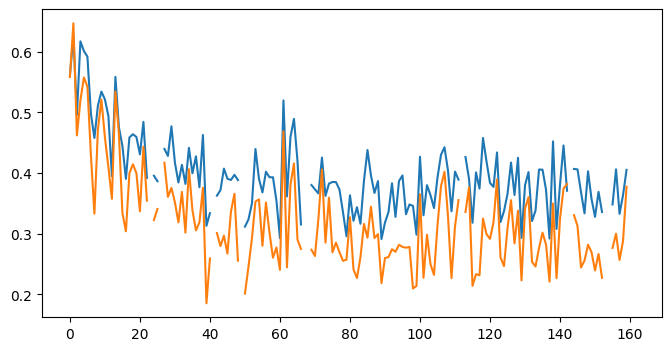

validation error for model_batch 1690: 
mean = 0.33000001311302185, median = 0.2800000011920929, std = 0.25
validation error for model_batch 1700: 
mean = 0.4000000059604645, median = 0.3199999928474426, std = 0.25999999046325684
validation error for model_batch 1710: 
mean = 0.4399999976158142, median = 0.3199999928474426, std = 0.36000001430511475
validation error for model_batch 1720: 
mean = 0.3400000035762787, median = 0.23000000417232513, std = 0.28999999165534973
validation error for model_batch 1730: 
mean = 0.3499999940395355, median = 0.23999999463558197, std = 0.2800000011920929
validation error for model_batch 1740: 
mean = 0.3400000035762787, median = 0.3100000023841858, std = 0.23000000417232513
validation error for model_batch 1750: 
mean = 0.5, median = 0.46000000834465027, std = 0.2800000011920929
validation error for model_batch 1760: 
mean = 0.38999998569488525, median = 0.3499999940395355, std = 0.2800000011920929
validation error for model_batch 1770: 
mean = 0.389

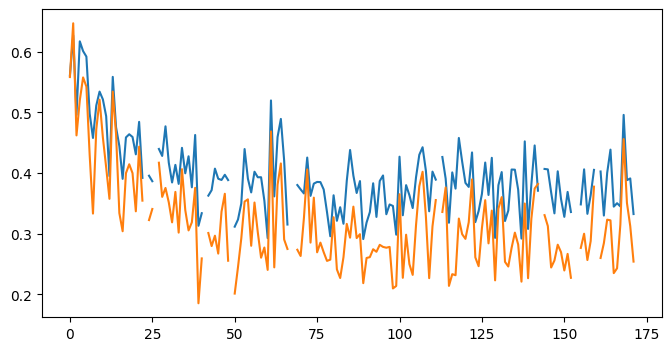

validation error for model_batch 1790: 
mean = 0.3799999952316284, median = 0.3199999928474426, std = 0.28999999165534973
validation error for model_batch 1800: 
mean = 0.36000001430511475, median = 0.2800000011920929, std = 0.25999999046325684
validation error for model_batch 1810: 
mean = 0.38999998569488525, median = 0.3199999928474426, std = 0.2800000011920929
validation error for model_batch 1820: 
mean = 0.44999998807907104, median = 0.4099999964237213, std = 0.2800000011920929
validation error for model_batch 1830: 
mean = 0.36000001430511475, median = 0.30000001192092896, std = 0.23000000417232513
validation error for model_batch 1840: 
mean = 0.3799999952316284, median = 0.27000001072883606, std = 0.2800000011920929
validation error for model_batch 1850: 
mean = 0.36000001430511475, median = 0.2800000011920929, std = 0.23999999463558197
validation error for model_batch 1860: 
mean = nan, median = nan, std = nan
validation error for model_batch 1870: 
mean = 0.3700000047683716,

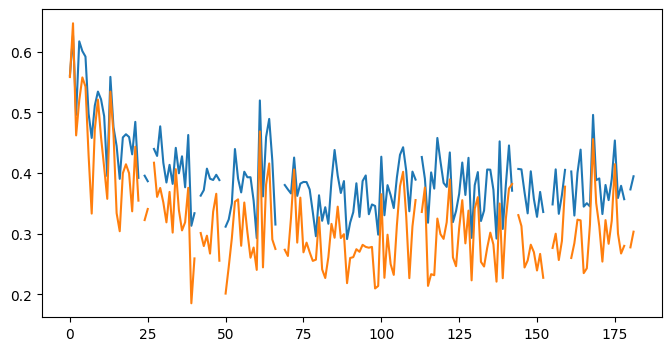

validation error for model_batch 1890: 
mean = 0.33000001311302185, median = 0.27000001072883606, std = 0.20999999344348907
validation error for model_batch 1900: 
mean = 0.38999998569488525, median = 0.30000001192092896, std = 0.2800000011920929
validation error for model_batch 1910: 
mean = nan, median = nan, std = nan
validation error for model_batch 1920: 
mean = 0.41999998688697815, median = 0.36000001430511475, std = 0.3100000023841858
validation error for model_batch 1930: 
mean = 0.44999998807907104, median = 0.3799999952316284, std = 0.33000001311302185
validation error for model_batch 1940: 
mean = nan, median = nan, std = nan
validation error for model_batch 1950: 
mean = 0.3499999940395355, median = 0.27000001072883606, std = 0.27000001072883606
validation error for model_batch 1960: 
mean = 0.4099999964237213, median = 0.3400000035762787, std = 0.2800000011920929
validation error for model_batch 1970: 
mean = 0.3799999952316284, median = 0.23999999463558197, std = 0.300000

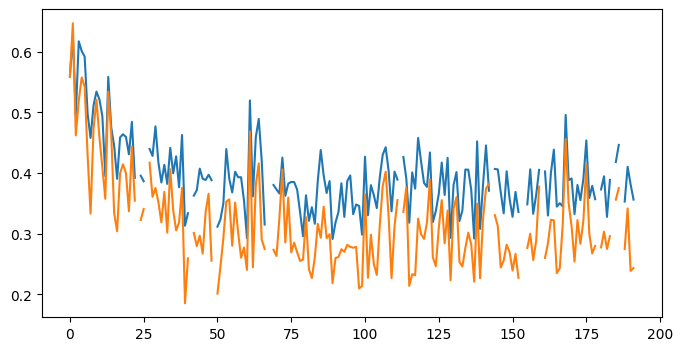

validation error for model_batch 1990: 
mean = 0.3799999952316284, median = 0.3400000035762787, std = 0.23999999463558197
validation error for model_batch 2000: 
mean = 0.4099999964237213, median = 0.33000001311302185, std = 0.30000001192092896
validation error for model_batch 2010: 
mean = 0.4300000071525574, median = 0.3700000047683716, std = 0.28999999165534973
validation error for model_batch 2020: 
mean = 0.47999998927116394, median = 0.4099999964237213, std = 0.33000001311302185
validation error for model_batch 2030: 
mean = 0.4399999976158142, median = 0.3799999952316284, std = 0.2800000011920929
validation error for model_batch 2040: 
mean = 0.38999998569488525, median = 0.33000001311302185, std = 0.27000001072883606
validation error for model_batch 2050: 
mean = 0.3199999928474426, median = 0.27000001072883606, std = 0.23999999463558197
validation error for model_batch 2060: 
mean = 0.41999998688697815, median = 0.36000001430511475, std = 0.2800000011920929
validation error fo

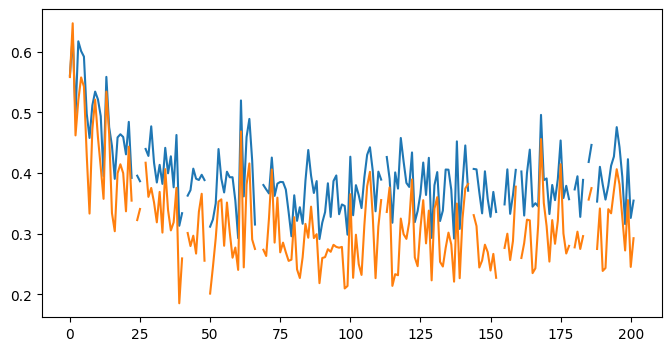

validation error for model_batch 2090: 
mean = 0.3700000047683716, median = 0.2800000011920929, std = 0.23999999463558197
validation error for model_batch 2100: 
mean = 0.3400000035762787, median = 0.33000001311302185, std = 0.2199999988079071
validation error for model_batch 2110: 
mean = 0.4099999964237213, median = 0.28999999165534973, std = 0.30000001192092896
validation error for model_batch 2120: 
mean = 0.33000001311302185, median = 0.2199999988079071, std = 0.30000001192092896
validation error for model_batch 2130: 
mean = 0.3499999940395355, median = 0.3100000023841858, std = 0.2800000011920929
validation error for model_batch 2140: 
mean = 0.3400000035762787, median = 0.2800000011920929, std = 0.23999999463558197
validation error for model_batch 2150: 
mean = 0.3499999940395355, median = 0.25, std = 0.3199999928474426


In [37]:
model_saves = os.listdir('../Monte Carlo/Model Saves MC v8_3')
model_inds = [int(i[6:-8]) for i in model_saves]
model_inds.sort()

val_mean_list = []
val_median_list = []
val_std_list = []

for m, model_ind in enumerate(model_inds):

    model = Model_v8()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v8_3/model_{}_batches'.format(model_ind)))

    validation_error_list = []

    i_game = 0
    while i_game < n_games:

        # if (white_wins + black_wins + draws) % 10 == 0:
        #     print('game {}, w: {}, b: {}, d: {}'.format(i_game, white_wins, black_wins, draws))

        game = Game()
        i = 0
        boards_white = [];  boards_black = []
        values_white = [];  values_black = []

        model.eval()

        while not game.is_over():
            
            i += 1
            moves = game.PossibleMoves()

            game_ini = game.copy()

            # value of initial board is not needed for validation
            # board_batch = [board_to_tensor(game.pieces)]
            board_batch = []

            # initial random moves to get interesting position, dont save these
            if i <= n_random_moves * 2:
                chosen_ind = np.random.choice(range(len(moves)))
                chosen_move = moves[chosen_ind]
                game.PlayMove(chosen_move)
                game.FlipBoard()
                continue

            mate = False

            # if move can win, play that move
            for move in moves:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    chosen_move = move
                    game = game_ini.copy()
                    break
                game = game_ini.copy()

            # play move that get highest value
            if not mate:
                board_tensor = torch.stack(board_batch)
                values = model(board_tensor)
                max_ind = torch.argmax(values).item()
                chosen_move = moves[max_ind]
                max_value = values[max_ind]
                
            game.PlayMove(chosen_move)

            # if move is mate, value has not yet been calculated, but is still necessary for validation
            if mate:
                max_value = model(torch.stack([board_to_tensor(game.pieces)]))

            if i % 2 == 1:
                boards_white.append(board_to_bool_tensor(game.pieces))
                values_white.append(max_value)
            if i % 2 == 0:
                boards_black.append(board_to_bool_tensor(game.pieces))
                values_black.append(max_value)

            game.FlipBoard()
        
        winner = game.get_winner()

        if winner == 'draw':
            draws += 1
            if not use_draws:
                # n_games += 1
                continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(boards_white) - 1 - i) for i in range(len(boards_white))]
        labels_black = [reward_black * gamma**(len(boards_black) - 1 - i) for i in range(len(boards_black))]

        # inputs_tens = torch.stack(boards_white + boards_black)
        labels_tens = torch.Tensor(labels_white + labels_black)
        values_tens = torch.Tensor(values_white + values_black)

        # plt.plot(labels_tens.detach().numpy(), label='labels')
        # plt.plot(values_tens.detach().numpy(), label='values')
        # plt.legend()
        # plt.show()

        validation_error = criterion(labels_tens, values_tens)
        # print(validation_error.item)
        validation_error_list.append(validation_error)

        i_game += 1
    
    val_mean_list.append(np.mean(validation_error_list))
    val_median_list.append(np.median(validation_error_list))
    val_std_list.append(np.std(validation_error_list))

    print('validation error for model_batch {}: '.format(model_ind))
    print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    if m % 10 == 1:
        plt.figure(figsize=(8, 4))
        plt.plot(val_mean_list)
        plt.plot(val_median_list)
        plt.show()
    

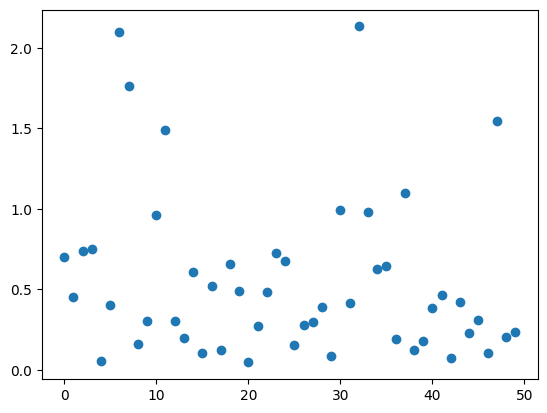

In [51]:
plt.scatter(range(len(validation_error_list)), validation_error_list)
plt.show()

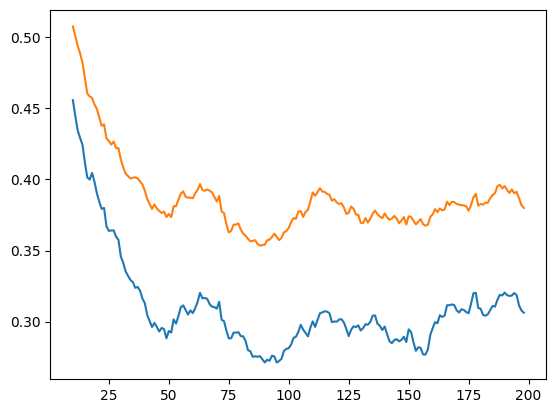

In [40]:
av_window = 20
plt.plot(range(av_window//2, len(val_median_list) - av_window//2), [np.nanmean(val_median_list[i:(i+av_window)]) for i in range(len(val_median_list) - av_window)], label='median')
plt.plot(range(av_window//2, len(val_mean_list) - av_window//2), [np.nanmean(val_mean_list[i:(i+av_window)]) for i in range(len(val_mean_list) - av_window)], label='mean')
        
plt.show()